### Aula 3 - Adaptative Machine Learning

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import mean_squared_log_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from category_encoders import OneHotEncoder
from category_encoders import TargetEncoder

In [86]:
pd.read_csv("2004_2021.tsv")  # Tenta ler um arquivo .tsv (valores separados por tabulação) e exibe a tabela (não está sendo armazenado em uma variável)

,DATA INICIAL\tDATA FINAL\tREGIÃO\tESTADO\tPRODUTO\tNÚMERO DE POSTOS PESQUISADOS\tUNIDADE DE MEDIDA\tPREÇO MÉDIO REVENDA\tDESVIO PADRÃO REVENDA\tPREÇO MÍNIMO REVENDA\tPREÇO MÁXIMO REVENDA\tMARGEM MÉDIA REVENDA\tCOEF DE VARIAÇÃO REVENDA\tPREÇO MÉDIO DISTRIBUIÇÃO\tDESVIO PADRÃO DISTRIBUIÇÃO\tPREÇO MÍNIMO DISTRIBUIÇÃO\tPREÇO MÁXIMO DISTRIBUIÇÃO\tCOEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09\t2004-05-15\tCENTRO OESTE\tDISTRITO...
1,2004-05-09\t2004-05-15\tCENTRO OESTE\tGOIAS\tE...
2,2004-05-09\t2004-05-15\tCENTRO OESTE\tMATO GRO...
3,2004-05-09\t2004-05-15\tCENTRO OESTE\tMATO GRO...
4,2004-05-09\t2004-05-15\tNORDESTE\tALAGOAS\tETA...
...,...
120818,2021-04-25\t2021-05-01\tNORTE\tRORAIMA\tOLEO D...
120819,2021-04-25\t2021-05-01\tSUL\tSANTA CATARINA\tO...
120820,2021-04-25\t2021-05-01\tSUDESTE\tSAO PAULO\tOL...
120821,2021-04-25\t2021-05-01\tNORDESTE\tSERGIPE\tOLE...


In [88]:
df = pd.read_csv("2004_2021.tsv", sep="\t")  # Lê o arquivo TSV e armazena o conteúdo no DataFrame 'df'
df.head()  # Mostra as primeiras 5 linhas do DataFrame

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [90]:
df["PRODUTO"].value_counts() # Checando quais são os combustíveis presentes na base de dados e a sua respectiva contagem

PRODUTO
GASOLINA COMUM        23570
GLP                   23561
ETANOL HIDRATADO      23440
ÓLEO DIESEL           21194
GNV                   14469
ÓLEO DIESEL S10        9113
OLEO DIESEL S10        2376
OLEO DIESEL            2351
GASOLINA ADITIVADA      749
Name: count, dtype: int64

In [91]:
df["PRODUTO"] == "ÓLEO DIESEL" #Mostrando como se cria uma máscara (mask) booleana: boolean mask

0         False
1         False
2         False
3         False
4         False
          ...  
120818    False
120819    False
120820    False
120821    False
120822    False
Name: PRODUTO, Length: 120823, dtype: bool

In [92]:
df[ df["PRODUTO"] == "ÓLEO DIESEL" ] # Com a mascara booleana é possível filtrar o dataframe original 

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
43547,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,125,R$/l,1.447,0.031,1.350,1.490,0.198,0.021,1.249,0.012,1.2153,1.2817,0.01
43548,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ÓLEO DIESEL,373,R$/l,1.437,0.059,1.300,1.660,0.157,0.041,1.28,0.024,1.2119,1.3801,0.019
43549,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ÓLEO DIESEL,190,R$/l,1.600,0.061,1.460,1.790,0.195,0.038,1.405,0.06,1.22,1.549,0.043
43550,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL,157,R$/l,1.526,0.045,1.399,1.659,0.163,0.029,1.363,0.022,1.3055,1.4407,0.016
43551,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ÓLEO DIESEL,105,R$/l,1.362,0.025,1.310,1.450,0.146,0.018,1.216,0.02,1.1768,1.272,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106722,2019-06-23,2019-06-29,NORTE,RORAIMA,ÓLEO DIESEL,7,R$/l,3.606,0.156,3.400,3.900,0.38,0.043,3.226,0.118,3.1126,3.4,0.037
106723,2019-06-23,2019-06-29,SUL,SANTA CATARINA,ÓLEO DIESEL,96,R$/l,3.504,0.125,3.199,3.799,0.481,0.036,3.023,0.092,2.8989,3.2038,0.03
106724,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,ÓLEO DIESEL,863,R$/l,3.448,0.156,3.099,4.220,0.401,0.045,3.047,0.097,2.8599,3.3481,0.032
106725,2019-06-23,2019-06-29,NORDESTE,SERGIPE,ÓLEO DIESEL,20,R$/l,3.620,0.107,3.470,3.820,0.313,0.030,3.307,0.046,3.2311,3.356,0.014


In [93]:
diesel = df[ df["PRODUTO"] == "ÓLEO DIESEL" ].copy() # Fazendo a seleção do dataframe apenas com dados do óleo diesel
diesel.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
43547,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,125,R$/l,1.447,0.031,1.350,1.490,0.198,0.021,1.249,0.012,1.2153,1.2817,0.01
43548,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ÓLEO DIESEL,373,R$/l,1.437,0.059,1.300,1.660,0.157,0.041,1.28,0.024,1.2119,1.3801,0.019
43549,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ÓLEO DIESEL,190,R$/l,1.600,0.061,1.460,1.790,0.195,0.038,1.405,0.06,1.22,1.549,0.043
43550,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL,157,R$/l,1.526,0.045,1.399,1.659,0.163,0.029,1.363,0.022,1.3055,1.4407,0.016
43551,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ÓLEO DIESEL,105,R$/l,1.362,0.025,1.310,1.450,0.146,0.018,1.216,0.02,1.1768,1.272,0.016


In [94]:
diesel.info() # Esse método do pandas permite acessar diversas informações importantes sobre o dataset, em especial os datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 21194 entries, 43547 to 106726
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATA INICIAL                   21194 non-null  object 
 1   DATA FINAL                     21194 non-null  object 
 2   REGIÃO                         21194 non-null  object 
 3   ESTADO                         21194 non-null  object 
 4   PRODUTO                        21194 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   21194 non-null  int64  
 6   UNIDADE DE MEDIDA              21194 non-null  object 
 7   PREÇO MÉDIO REVENDA            21194 non-null  float64
 8   DESVIO PADRÃO REVENDA          21194 non-null  float64
 9   PREÇO MÍNIMO REVENDA           21194 non-null  float64
 10  PREÇO MÁXIMO REVENDA           21194 non-null  float64
 11  MARGEM MÉDIA REVENDA           21194 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA       21194 non-null 

In [96]:
diesel["PRODUTO"]

43547     ÓLEO DIESEL
43548     ÓLEO DIESEL
43549     ÓLEO DIESEL
43550     ÓLEO DIESEL
43551     ÓLEO DIESEL
             ...     
106722    ÓLEO DIESEL
106723    ÓLEO DIESEL
106724    ÓLEO DIESEL
106725    ÓLEO DIESEL
106726    ÓLEO DIESEL
Name: PRODUTO, Length: 21194, dtype: object

In [95]:
diesel.dtypes  # Checa os datatypes presentes no DataFrame

DATA INICIAL                      object
DATA FINAL                        object
REGIÃO                            object
ESTADO                            object
PRODUTO                           object
NÚMERO DE POSTOS PESQUISADOS       int64
UNIDADE DE MEDIDA                 object
PREÇO MÉDIO REVENDA              float64
DESVIO PADRÃO REVENDA            float64
PREÇO MÍNIMO REVENDA             float64
PREÇO MÁXIMO REVENDA             float64
MARGEM MÉDIA REVENDA              object
COEF DE VARIAÇÃO REVENDA         float64
PREÇO MÉDIO DISTRIBUIÇÃO          object
DESVIO PADRÃO DISTRIBUIÇÃO        object
PREÇO MÍNIMO DISTRIBUIÇÃO         object
PREÇO MÁXIMO DISTRIBUIÇÃO         object
COEF DE VARIAÇÃO DISTRIBUIÇÃO     object
dtype: object

In [98]:
diesel["DATA INICIAL"].info()

<class 'pandas.core.series.Series'>
Index: 21194 entries, 43547 to 106726
Series name: DATA INICIAL
Non-Null Count  Dtype 
--------------  ----- 
21194 non-null  object
dtypes: object(1)
memory usage: 331.2+ KB


In [99]:
diesel["DATA INICIAL"] = pd.to_datetime( diesel["DATA INICIAL"] )  #Converte a coluna 'DATA INICIAL' para o tipo datetime

diesel["DATA FINAL"] = pd.to_datetime( diesel["DATA FINAL"] )  #Converte a coluna 'DATA FINAL' para o tipo datetime

In [100]:
diesel["DATA FINAL"] - diesel["DATA INICIAL"]  # Calcula a diferença de dias entre a data final e a data inicial para cada linha

43547    6 days
43548    6 days
43549    6 days
43550    6 days
43551    6 days
          ...  
106722   6 days
106723   6 days
106724   6 days
106725   6 days
106726   6 days
Length: 21194, dtype: timedelta64[ns]

In [101]:
(diesel["DATA FINAL"] - diesel["DATA INICIAL"]).value_counts()  # Conta quantas vezes cada duração (diferença entre datas) aparece no DataFrame

6 days    21194
Name: count, dtype: int64

### Split temporal (sem vazamento) - data leakage

- O split Treino/Validação/Teste deve respeitar o **tempo**: dados do futuro **não** podem influenciar o passado.
- Garanta que qualquer ajuste/fit (encoders, scalers, modelos) seja feito **apenas** no **treino**, aplicando `transform` no restante.
- Use `assert` para checar ordem crescente dentro de cada chave (ex.: `ESTADO`).

In [102]:
diesel_treino = diesel[diesel["DATA FINAL"] < "2019-01-01"].copy()  # Cria um novo DataFrame apenas com dados anteriores a 2019 (conjunto de treino)

diesel_treino.head()  # Exibe as primeiras 5 linhas do DataFrame de treino

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
43547,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,125,R$/l,1.447,0.031,1.350,1.490,0.198,0.021,1.249,0.012,1.2153,1.2817,0.01
43548,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ÓLEO DIESEL,373,R$/l,1.437,0.059,1.300,1.660,0.157,0.041,1.28,0.024,1.2119,1.3801,0.019
43549,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ÓLEO DIESEL,190,R$/l,1.600,0.061,1.460,1.790,0.195,0.038,1.405,0.06,1.22,1.549,0.043
43550,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL,157,R$/l,1.526,0.045,1.399,1.659,0.163,0.029,1.363,0.022,1.3055,1.4407,0.016
43551,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ÓLEO DIESEL,105,R$/l,1.362,0.025,1.310,1.450,0.146,0.018,1.216,0.02,1.1768,1.272,0.016


In [103]:
diesel_valid = diesel[diesel["DATA FINAL"] >= "2019-01-01"].copy()  # Cria um novo DataFrame com dados a partir de 2019 (conjunto de validação)

diesel_valid.head()  # Exibe as primeiras 5 linhas do DataFrame de validação

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
102947,2018-12-30,2019-01-05,NORTE,ACRE,ÓLEO DIESEL,36,R$/l,4.545,0.134,4.220,4.840,0.735,0.029,3.81,0.201,3.2942,3.9326,0.053
102948,2018-12-30,2019-01-05,NORDESTE,ALAGOAS,ÓLEO DIESEL,44,R$/l,3.709,0.168,3.450,4.089,0.513,0.045,3.196,0.115,3.0253,3.3741,0.036
102949,2018-12-30,2019-01-05,NORTE,AMAPA,ÓLEO DIESEL,16,R$/l,3.860,0.147,3.620,4.200,0.462,0.038,3.398,0.009,3.385,3.4052,0.003
102950,2018-12-30,2019-01-05,NORTE,AMAZONAS,ÓLEO DIESEL,45,R$/l,3.708,0.143,3.550,4.050,0.45,0.039,3.258,0.116,3.0095,3.4372,0.036
102951,2018-12-30,2019-01-05,NORDESTE,BAHIA,ÓLEO DIESEL,206,R$/l,3.446,0.205,3.118,4.300,0.454,0.059,2.992,0.111,2.8489,3.4454,0.037


#### BASELINE FORECAST

In [104]:
y_treino = diesel_treino["PREÇO MÉDIO REVENDA"].copy()  # Cria uma cópia da coluna 'PREÇO MÉDIO REVENDA' do conjunto de treino como variável target (y)

y_treino  # Exibe a série com os preços médios de revenda do conjunto de treino

43547     1.447
43548     1.437
43549     1.600
43550     1.526
43551     1.362
          ...  
102818    3.546
102819    3.341
102820    3.313
102821    3.497
102822    3.475
Name: PREÇO MÉDIO REVENDA, Length: 20492, dtype: float64

In [105]:
y_valid = diesel_valid["PREÇO MÉDIO REVENDA"].copy()  # Cria uma cópia da coluna 'PREÇO MÉDIO REVENDA' do conjunto de validação como variável target (y)

y_valid  # Exibe a série com os preços médios de revenda do conjunto de validação

102947    4.545
102948    3.709
102949    3.860
102950    3.708
102951    3.446
          ...  
106722    3.606
106723    3.504
106724    3.448
106725    3.620
106726    3.623
Name: PREÇO MÉDIO REVENDA, Length: 702, dtype: float64

In [106]:
baseline_treino = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].shift(1)  # Cria uma baseline deslocando o preço médio de revenda em 1 semana para trás, por estado (valor anterior como previsão)

baseline_treino  # Exibe a série baseline para o conjunto de treino

43547       NaN
43548       NaN
43549       NaN
43550       NaN
43551       NaN
          ...  
102818    3.559
102819    3.368
102820    3.308
102821    3.516
102822    3.510
Name: PREÇO MÉDIO REVENDA, Length: 20492, dtype: float64

In [107]:
baseline_valid = diesel_valid.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].shift(1)  # Cria uma baseline para validação usando o preço da semana anterior por estado como previsão

baseline_valid  # Exibe a série baseline para o conjunto de validação

102947      NaN
102948      NaN
102949      NaN
102950      NaN
102951      NaN
          ...  
106722    3.625
106723    3.524
106724    3.474
106725    3.621
106726    3.609
Name: PREÇO MÉDIO REVENDA, Length: 702, dtype: float64

In [108]:
diesel_treino[diesel_treino["ESTADO"] == "SAO PAULO"].head()  # Filtra o DataFrame de treino para mostrar as primeiras 5 linhas do estado de São Paulo

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
43570,2004-05-09,2004-05-15,SUDESTE,SAO PAULO,ÓLEO DIESEL,3196,R$/l,1.368,0.057,1.210,1.590,0.158,0.042,1.21,0.026,1.141,1.369,0.021
43597,2004-05-16,2004-05-22,SUDESTE,SAO PAULO,ÓLEO DIESEL,3201,R$/l,1.368,0.057,1.239,1.599,0.158,0.042,1.21,0.026,1.125,1.369,0.021
43624,2004-05-23,2004-05-29,SUDESTE,SAO PAULO,ÓLEO DIESEL,3216,R$/l,1.368,0.057,1.220,1.590,0.159,0.042,1.209,0.025,1.125,1.369,0.021
43651,2004-05-30,2004-06-05,SUDESTE,SAO PAULO,ÓLEO DIESEL,3200,R$/l,1.368,0.057,1.220,1.669,0.159,0.042,1.209,0.025,1.125,1.369,0.021
43678,2004-06-06,2004-06-12,SUDESTE,SAO PAULO,ÓLEO DIESEL,3222,R$/l,1.369,0.056,1.220,1.590,0.159,0.041,1.21,0.025,1.125,1.369,0.021


In [109]:
np.sqrt(mean_squared_log_error( 
                                y_valid[baseline_valid.notnull()],  # Valores reais correspondentes apenas às previsões não nulas da baseline
                                baseline_valid[baseline_valid.notnull()]  # Previsões da baseline (sem valores NaN)
                                )
                               )  # Calcula o erro RMSLE (Root Mean Squared Log Error) entre os valores reais e a baseline

np.float64(0.007253230008613582)

In [110]:
0.00725323000861358 * 100  # Converte o erro RMSLE para porcentagem (0.72%)


0.7253230008613579

In [112]:
erro_baseline = np.sqrt(mean_squared_log_error( 
                                                y_valid[baseline_valid.notnull()],  # Valores reais onde a baseline tem valor
                                                baseline_valid[baseline_valid.notnull()]  # Previsões da baseline sem valores nulos
                                                )) * 100  # Calcula o erro RMSLE e converte para porcentagem, armazenando em 'erro_baseline'
erro_baseline

np.float64(0.7253230008613583)

#### Machine Learning

In [113]:
diesel_treino.head()  # Exibe as primeiras 5 linhas do DataFrame de treino para inspeção dos dados

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
43547,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,125,R$/l,1.447,0.031,1.350,1.490,0.198,0.021,1.249,0.012,1.2153,1.2817,0.01
43548,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ÓLEO DIESEL,373,R$/l,1.437,0.059,1.300,1.660,0.157,0.041,1.28,0.024,1.2119,1.3801,0.019
43549,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ÓLEO DIESEL,190,R$/l,1.600,0.061,1.460,1.790,0.195,0.038,1.405,0.06,1.22,1.549,0.043
43550,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL,157,R$/l,1.526,0.045,1.399,1.659,0.163,0.029,1.363,0.022,1.3055,1.4407,0.016
43551,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ÓLEO DIESEL,105,R$/l,1.362,0.025,1.310,1.450,0.146,0.018,1.216,0.02,1.1768,1.272,0.016


### Gráficos: como ler e evitar linhas quebradas

- Se existir mais de um `ESTADO` por data, plote **por estado** ou **agregue por data** (média/mediana) para obter uma linha única.
- Garanta `DATA FINAL` como `datetime` e a série em ordem crescente.
- Para comparar Treino vs Validação, use **mesmo `ylim`**.


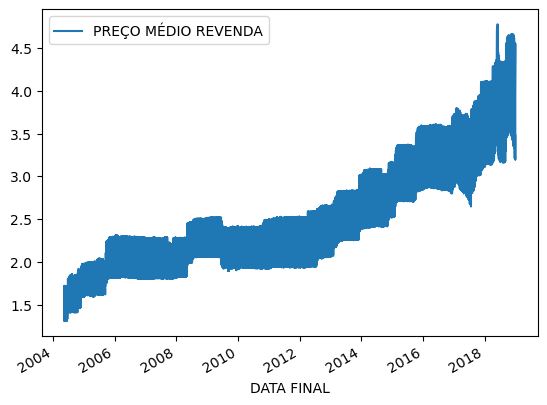

In [114]:
diesel_treino.plot(x="DATA FINAL", y="PREÇO MÉDIO REVENDA");  # Plota um gráfico de linha com a evolução do preço médio de revenda ao longo do tempo no conjunto de treino

### Alvo: variação futura (Δ no próximo período)

**Porquê:** modelar o movimento de curto prazo a partir de `t → t+1`.
**Definição comum:**
- Absoluta: `y_{t+1} - y_t`
- Percentual: `(y_{t+1}/y_t) - 1`

**Cuidados:**
- Ordene por `['ESTADO','DATA FINAL']` antes do `shift(-1)`.
- A última data de cada `ESTADO` vira `NaN` no alvo (não existe `t+1`) – descarte ou trate.
- Calcule o alvo **dentro de cada split** para evitar vazamento de dados(data leakage).


In [116]:
def target_diff(x):  # Define uma função que calcula a variação futura do valor (diferença entre a próxima semana e a atual)
    return x.diff().shift(-1)  # Aplica diff() e desloca para cima, ou seja, retorna x[t+1] - x[t] na linha t

In [117]:
diesel_treino.sort_values(by=["ESTADO", "DATA FINAL"], inplace=True)  # Ordena o DataFrame de treino primeiro por estado e depois por data, garantindo a ordem temporal dentro de cada grupo

In [118]:
diesel_treino["DIFF PREÇO MÉDIO REVENDA"] = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].transform(target_diff)  # Aplica a função de variação futura do preço dentro de cada estado e armazena na nova coluna

### `groupby().transform(...)` vs `apply(...)`

- Prefira `transform` quando precisar **manter o mesmo índice** do DataFrame (alinhamento 1:1 na atribuição).
- `apply` geralmente retorna uma Series com **MultiIndex**, o que quebra a atribuição direta em uma nova coluna.


In [119]:
diesel_treino.reset_index(inplace=True)  # Reseta o índice do DataFrame após o uso de groupby/apply, evitando que o índice agrupado cause problemas em operações futuras

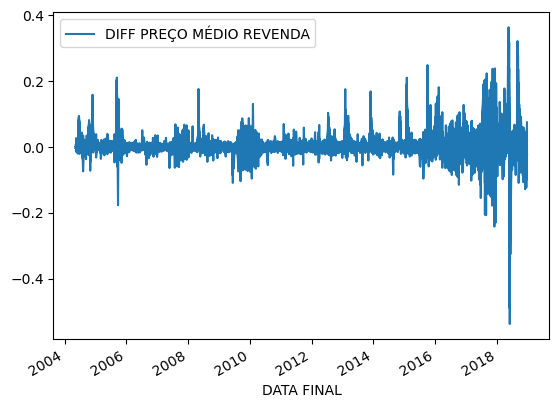

In [120]:
diesel_treino.plot(x="DATA FINAL", y="DIFF PREÇO MÉDIO REVENDA");  # Plota um gráfico de linha mostrando a variação futura do preço médio de revenda ao longo do tempo no conjunto de treino

In [122]:
#Como suspeitávamos, a média está muito próxima de zero, demonstrando uma série muito próxima de estacionária
diesel_treino["DIFF PREÇO MÉDIO REVENDA"].mean()

np.float64(0.002855313950647447)

In [126]:
diesel_valid.sort_values(by=["ESTADO", "DATA FINAL"], inplace=True)  # Ordena o DataFrame de validação por estado e data, garantindo a sequência temporal correta dentro de cada grupo

In [127]:
diesel_valid["DIFF PREÇO MÉDIO REVENDA"] = diesel_valid.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].transform(target_diff)  # Aplica a função que calcula a variação futura do preço médio de revenda dentro de cada estado, armazenando o resultado na nova coluna

In [128]:
diesel_valid.reset_index(inplace=True)  # Reseta o índice do DataFrame de validação após o uso de groupby/apply, garantindo um índice sequencial padrão

In [130]:
# depois de criar diesel_treino e diesel_valid
lista_dataframes = [diesel_treino, diesel_valid]

for df in lista_dataframes:
    df["DATA FINAL"] = pd.to_datetime(df["DATA FINAL"], dayfirst=True, errors="coerce")
    df.sort_values(["ESTADO", "DATA FINAL"], inplace=True)
    # exemplo de diff futura absoluta
    df["DIFF PREÇO MÉDIO REVENDA"] = (
        df.groupby("ESTADO")["PREÇO MÉDIO REVENDA"].transform(lambda s: s.shift(-1) - s)
    )

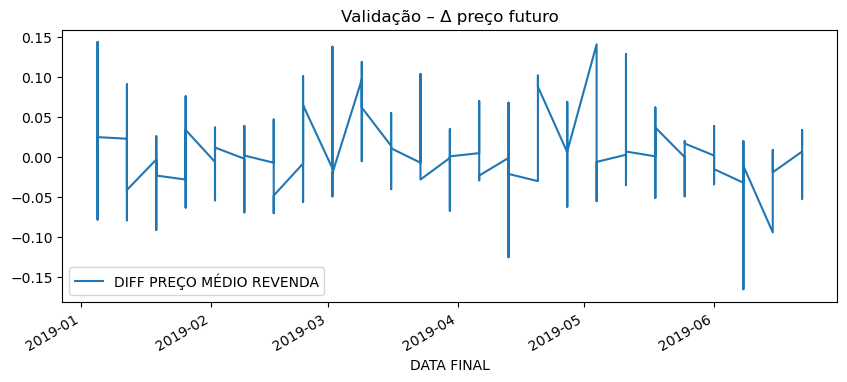

In [131]:
# ORDEM E PLOT DA VALIDAÇÃO  <<-- INSERIR AQUI, no lugar do plot antigo de diesel_valid
diesel_valid = diesel_valid.sort_values(["DATA FINAL", "ESTADO"]).reset_index(drop=True)
diesel_valid = diesel_valid.dropna(subset=["DIFF PREÇO MÉDIO REVENDA"])

diesel_valid.plot(
    x="DATA FINAL",
    y="DIFF PREÇO MÉDIO REVENDA",
    figsize=(10, 4),
    title="Validação – Δ preço futuro"
);

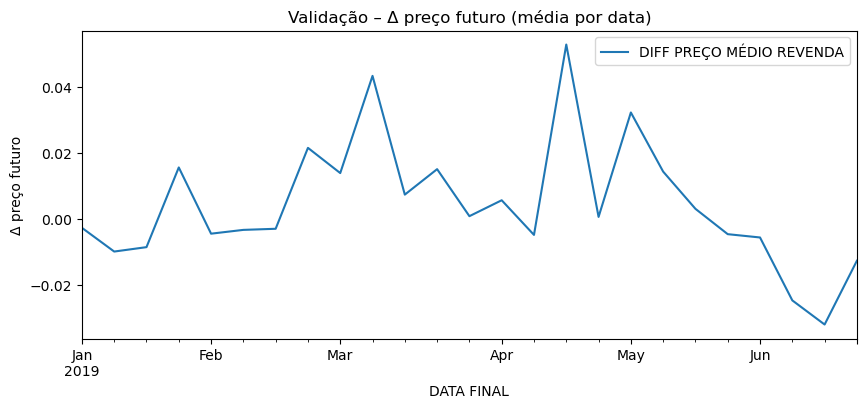

In [133]:
# média (ou .median()) dos estados por data
valid_daily = (diesel_valid
    .groupby("DATA FINAL", as_index=False)["DIFF PREÇO MÉDIO REVENDA"].mean()
    .sort_values("DATA FINAL"))

ax = valid_daily.plot(
    x="DATA FINAL", y="DIFF PREÇO MÉDIO REVENDA",
    figsize=(10,4), title="Validação – Δ preço futuro (média por data)"
)
ax.set_ylabel("Δ preço futuro");

#### FEATURE ENGINEERING

In [134]:
df_x_treino = pd.DataFrame(index=diesel_treino.index)  # Cria um novo DataFrame vazio para as features de treino, mantendo o mesmo índice de diesel_treino
df_x_valid = pd.DataFrame(index=diesel_valid.index)  # Cria um novo DataFrame vazio para as features de validação, mantendo o mesmo índice de diesel_valid

In [136]:
df_x_treino["DATA FINAL"] = diesel_treino["DATA FINAL"]  # Copia a coluna 'DATA FINAL' do DataFrame de treino para o DataFrame de features de treino
df_x_valid["DATA FINAL"] = diesel_valid["DATA FINAL"]  # Copia a coluna 'DATA FINAL' do DataFrame de validação para o DataFrame de features de validação

In [138]:
diesel_treino.sort_values(by=["DATA FINAL"], inplace=True)  # Ordena o DataFrame de treino apenas pela data final, garantindo a sequência temporal global (sem considerar o estado)

In [139]:
df_x_treino["DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA"] = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"]\
                                                                                                        .transform(target_diff)  # Aplica a função de variação futura do preço por estado e armazena como variável alvo no DataFrame de features de treino

In [140]:
diesel_valid.sort_values(by=["ESTADO", "DATA FINAL"], inplace=True)  # Ordena o DataFrame de validação por estado e data final, garantindo a ordem temporal correta dentro de cada grupo de estado

In [141]:
df_x_valid["DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA"] = diesel_valid.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"]\
                                                                                                        .transform(target_diff)  # Aplica a função de variação futura do preço por estado e armazena como variável alvo no DataFrame de features de validação

#### FEAURES AVANÇADAS

#### Sazonal

In [142]:
df_x_treino["MES"] = diesel_treino["DATA FINAL"].dt.month  # Extrai o número do mês da data final e armazena como feature
df_x_treino["DIA"] = diesel_treino["DATA FINAL"].dt.day  # Extrai o número do dia do mês da data final
df_x_treino["DIA_DO_ANO"] = diesel_treino["DATA FINAL"].dt.dayofyear  # Extrai o número do dia no ano (1 a 366) como feature sazonal
df_x_treino["SEMANA_DO_ANO"] = diesel_treino["DATA FINAL"].dt.isocalendar().week  # Extrai o número da semana ISO do ano como variável sazonal
# df_x_treino["DIA_DA_SEMANA"] = diesel_treino["DATA FINAL"].dt.weekday  # (Comentado) Extraía o dia da semana, usado anteriormente

In [143]:
df_x_valid["MES"] = diesel_valid["DATA FINAL"].dt.month  # Extrai o número do mês da data final no conjunto de validação
df_x_valid["DIA"] = diesel_valid["DATA FINAL"].dt.day  # Extrai o número do dia do mês da data final no conjunto de validação
df_x_valid["DIA_DO_ANO"] = diesel_valid["DATA FINAL"].dt.dayofyear  # Extrai o número do dia no ano (1 a 366) no conjunto de validação
df_x_valid["SEMANA_DO_ANO"] = diesel_valid["DATA FINAL"].dt.isocalendar().week  # Extrai o número da semana ISO do ano no conjunto de validação
# df_x_valid["DIA_DA_SEMANA"] = diesel_valid["DATA FINAL"].dt.weekday  # (Comentado) Extraía o dia da semana, usado anteriormente

In [147]:
diesel_treino.sort_values(by=["ESTADO", "DATA FINAL"], inplace=True)  #Ordena o DataFrame de treino por estado e data final, garantindo sequência temporal correta dentro de cada estado
diesel_valid.sort_values(by=["ESTADO", "DATA FINAL"], inplace=True)  #Ordena o DataFrame de validação por estado e data final, garantindo sequência temporal correta dentro de cada estado

In [148]:
df_x_treino.head()

,DATA FINAL,DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO
0,2004-05-15,-0.009,5,15,136,20
1,2004-05-22,0.001,5,22,143,21
2,2004-05-29,-0.001,5,29,150,22
3,2004-06-05,-0.001,6,5,157,23
4,2004-06-12,0.003,6,12,164,24


In [149]:
df_x_valid.head()

,DATA FINAL,DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO
0,2019-01-05,-0.001,1,5,5,1
1,2019-01-05,0.006,1,5,5,1
2,2019-01-05,0.144,1,5,5,1
3,2019-01-05,-0.047,1,5,5,1
4,2019-01-05,-0.028,1,5,5,1


#### LAG

#### lag = yt - 1
#### lag = yt - 2
#### lag = yt - 3
#### lag = yt - 4
### .
### .
### 
#### lag = yt - 12

In [46]:
"PREÇO_MEDIO_REVENDA_ATUAL_"

'PREÇO_MEDIO_REVENDA_ATUAL_'

In [146]:
l = 2
f"PREÇO_MEDIO_REVENDA_ATUAL_{l}" #f-string

'PREÇO_MEDIO_REVENDA_ATUAL_2'

In [150]:
for l in range(0,12):  #Itera de 0 a 11 para criar lags semanais dos preços médios de revenda
    df_x_treino[f"PREÇO_MEDIO_REVENDA_ATUAL_{l}"] = diesel_treino["PREÇO MÉDIO REVENDA"].shift(l)  #Cria a feature de preço atual com lag 'l' no treino
    df_x_valid[f"PREÇO_MEDIO_REVENDA_ATUAL_{l}"] = diesel_valid["PREÇO MÉDIO REVENDA"].shift(l)  #Cria a mesma feature com lag 'l' no conjunto de validação

#### Diferença do Lag

#### Diff_lag = yt_1 - yt_2

In [151]:
diesel_treino.sort_values(by=["ESTADO", "DATA FINAL"], inplace=True)  #Ordena novamente o DataFrame de treino por estado e data para garantir consistência antes de calcular diferenças
diesel_valid.sort_values(by=["ESTADO", "DATA FINAL"], inplace=True)  #Ordena novamente o DataFrame de validação por estado e data para garantir consistência antes de calcular diferenças

In [152]:
for l in range(1,12):  #Itera de 1 a 11 para calcular diferenças entre o preço atual e os preços de semanas anteriores
    df_x_treino[f"DIFF_PREÇO_MEDIO_REVENDA_ATUAL_{l}"] = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].diff(l)  #Calcula a diferença entre o preço atual e o de l semanas atrás no treino
    df_x_valid[f"DIFF_PREÇO_MEDIO_REVENDA_ATUAL_{l}"] = diesel_valid.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].diff(l)  #Calcula a mesma diferença no conjunto de validação

In [153]:
diesel_treino.sort_values(by=["ESTADO", "DATA FINAL"], inplace=True)  #Ordena novamente o DataFrame de treino por estado e data para garantir consistência antes de calcular diferenças
diesel_valid.sort_values(by=["ESTADO", "DATA FINAL"], inplace=True)  #Ordena novamente o DataFrame de validação por estado e data para garantir consistência antes de calcular diferenças

#### Media Móvel

In [154]:
diesel_treino.sort_values(by=["ESTADO", "DATA FINAL"], inplace=True)  #Ordena o DataFrame de treino por estado e data final para garantir a sequência correta antes de aplicar média móvel

In [155]:
roll = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].rolling(12).mean()  #Calcula a média móvel de 12 semanas do preço médio de revenda para cada estado
roll.head()  # Exibe as primeiras linhas da média móvel calculada

ESTADO   
ACRE    0   NaN
        1   NaN
        2   NaN
        3   NaN
        4   NaN
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [156]:
roll.reset_index(level=0, drop=True).head()  #Remove o nível do índice correspondente ao 'ESTADO' e mantém apenas o índice original do DataFrame, exibindo as primeiras linhas da série resultante

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [157]:
diesel_treino.sort_values(by=["ESTADO", "DATA FINAL"], inplace=True)  # Garante que o DataFrame de treino esteja ordenado corretamente por estado e data antes de aplicar médias móveis
diesel_valid.sort_values(by=["ESTADO", "DATA FINAL"], inplace=True)  # Garante que o DataFrame de validação esteja ordenado corretamente por estado e data antes de aplicar médias móveis

In [158]:
for l in range(2,12):  # Itera de 2 a 11 para calcular médias móveis com diferentes janelas (em semanas)
    df_x_treino[f"MEDIA_MOVEL_PREÇO_MEDIO_REVENDA_{l}_SEMANAS"] = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"]\
        .rolling(l).mean().reset_index(level=0, drop=True)  # Calcula a média móvel de 'l' semanas por estado no treino e remove o índice do groupby

    df_x_valid[f"MEDIA_MOVEL_PREÇO_MEDIO_REVENDA_{l}_SEMANAS"] = diesel_valid.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"]\
        .rolling(l).mean().reset_index(level=0, drop=True)  # Calcula a média móvel de 'l' semanas por estado na validação e remove o índice do groupby

In [159]:
df_x_treino.head()

,DATA FINAL,DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,PREÇO_MEDIO_REVENDA_ATUAL_0,PREÇO_MEDIO_REVENDA_ATUAL_1,PREÇO_MEDIO_REVENDA_ATUAL_2,PREÇO_MEDIO_REVENDA_ATUAL_3,...,MEDIA_MOVEL_PREÇO_MEDIO_REVENDA_2_SEMANAS,MEDIA_MOVEL_PREÇO_MEDIO_REVENDA_3_SEMANAS,MEDIA_MOVEL_PREÇO_MEDIO_REVENDA_4_SEMANAS,MEDIA_MOVEL_PREÇO_MEDIO_REVENDA_5_SEMANAS,MEDIA_MOVEL_PREÇO_MEDIO_REVENDA_6_SEMANAS,MEDIA_MOVEL_PREÇO_MEDIO_REVENDA_7_SEMANAS,MEDIA_MOVEL_PREÇO_MEDIO_REVENDA_8_SEMANAS,MEDIA_MOVEL_PREÇO_MEDIO_REVENDA_9_SEMANAS,MEDIA_MOVEL_PREÇO_MEDIO_REVENDA_10_SEMANAS,MEDIA_MOVEL_PREÇO_MEDIO_REVENDA_11_SEMANAS
0,2004-05-15,-0.009,5,15,136,20,1.723,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-05-22,0.001,5,22,143,21,1.714,1.723,NaN,NaN,...,1.7185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-05-29,-0.001,5,29,150,22,1.715,1.714,1.723,NaN,...,1.7145,1.717333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-06-05,-0.001,6,5,157,23,1.714,1.715,1.714,1.723,...,1.7145,1.714333,1.7165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-06-12,0.003,6,12,164,24,1.713,1.714,1.715,1.714,...,1.7135,1.714000,1.7140,1.7158,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
df_x_treino["ESTADO"] = diesel_treino["ESTADO"]  # Adiciona a coluna 'ESTADO' ao DataFrame de features de treino
df_x_treino["REGIAO"] = diesel_treino["REGIÃO"]  # Adiciona a coluna 'REGIÃO' ao DataFrame de features de treino

In [161]:
df_x_valid["ESTADO"] = diesel_valid["ESTADO"]  # Adiciona a coluna 'ESTADO' ao DataFrame de features de validação
df_x_valid["REGIAO"] = diesel_valid["REGIÃO"]  # Adiciona a coluna 'REGIÃO' ao DataFrame de features de validação

In [162]:
ohe_estado = OneHotEncoder(cols=["REGIAO", "ESTADO"], use_cat_names=True, drop_invariant=True)  # Cria um codificador one-hot para as colunas 'REGIAO' e 'ESTADO', com nomes legíveis e remoção de colunas invariantes
df_x_treino = ohe_estado.fit_transform(df_x_treino)  # Aplica o one-hot encoding no conjunto de treino e ajusta o codificador
df_x_valid = ohe_estado.transform(df_x_valid)  # Aplica o mesmo codificador (ajustado com os dados de treino) ao conjunto de validação

In [163]:
df_x_treino.head()

,DATA FINAL,DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,PREÇO_MEDIO_REVENDA_ATUAL_0,PREÇO_MEDIO_REVENDA_ATUAL_1,PREÇO_MEDIO_REVENDA_ATUAL_2,PREÇO_MEDIO_REVENDA_ATUAL_3,...,ESTADO_RORAIMA,ESTADO_SANTA CATARINA,ESTADO_SAO PAULO,ESTADO_SERGIPE,ESTADO_TOCANTINS,REGIAO_NORTE,REGIAO_NORDESTE,REGIAO_CENTRO OESTE,REGIAO_SUDESTE,REGIAO_SUL
0,2004-05-15,-0.009,5,15,136,20,1.723,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
1,2004-05-22,0.001,5,22,143,21,1.714,1.723,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
2,2004-05-29,-0.001,5,29,150,22,1.715,1.714,1.723,NaN,...,0,0,0,0,0,1,0,0,0,0
3,2004-06-05,-0.001,6,5,157,23,1.714,1.715,1.714,1.723,...,0,0,0,0,0,1,0,0,0,0
4,2004-06-12,0.003,6,12,164,24,1.713,1.714,1.715,1.714,...,0,0,0,0,0,1,0,0,0,0


In [164]:
df_x_valid.head()

,DATA FINAL,DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,PREÇO_MEDIO_REVENDA_ATUAL_0,PREÇO_MEDIO_REVENDA_ATUAL_1,PREÇO_MEDIO_REVENDA_ATUAL_2,PREÇO_MEDIO_REVENDA_ATUAL_3,...,ESTADO_RORAIMA,ESTADO_SANTA CATARINA,ESTADO_SAO PAULO,ESTADO_SERGIPE,ESTADO_TOCANTINS,REGIAO_NORTE,REGIAO_NORDESTE,REGIAO_CENTRO OESTE,REGIAO_SUDESTE,REGIAO_SUL
0,2019-01-05,-0.001,1,5,5,1,4.545,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
1,2019-01-05,0.006,1,5,5,1,3.709,4.603,4.697,4.729,...,0,0,0,0,0,0,1,0,0,0
2,2019-01-05,0.144,1,5,5,1,3.860,3.754,3.774,3.754,...,0,0,0,0,0,1,0,0,0,0
3,2019-01-05,-0.047,1,5,5,1,3.708,4.136,4.136,4.221,...,0,0,0,0,0,1,0,0,0,0
4,2019-01-05,-0.028,1,5,5,1,3.446,3.674,3.756,3.752,...,0,0,0,0,0,0,1,0,0,0


#### Ranking Preços por Estado

In [165]:
df_x_treino["RANKING_PREÇO_SEMANAL"] = df_x_treino.groupby(["DATA FINAL"])["DIFF_PREÇO_MEDIO_REVENDA_ATUAL_1"].rank()  # Calcula o ranking do aumento ou queda de preço para cada estado dentro da mesma semana no treino
df_x_valid["RANKING_PREÇO_SEMANAL"] = df_x_valid.groupby(["DATA FINAL"])["DIFF_PREÇO_MEDIO_REVENDA_ATUAL_1"].rank()  # Faz o mesmo para o conjunto de validação

df_x_treino[["DATA FINAL","RANKING_PREÇO_SEMANAL"]].tail()  # Exibe as últimas linhas com a data e o ranking do preço semanal no conjunto de treino

,DATA FINAL,RANKING_PREÇO_SEMANAL
20487,2018-12-01,15.0
20488,2018-12-08,16.0
20489,2018-12-15,16.0
20490,2018-12-22,2.0
20491,2018-12-29,3.0


In [166]:
df_x_treino = df_x_treino.drop(["DATA FINAL"], axis=1)  # Remove a coluna 'DATA FINAL' do DataFrame de treino, pois ela não será usada como feature numérica no modelo
df_x_valid = df_x_valid.drop(["DATA FINAL"], axis=1)  # Remove a coluna 'DATA FINAL' do DataFrame de validação pelo mesmo motivo

#### Modelos Deep Learning

In [167]:
df_x_treino = df_x_treino.dropna()  # Remove todas as linhas com valores nulos do DataFrame de treino, garantindo que o modelo receba apenas dados completos
df_x_valid = df_x_valid.dropna()  # Remove todas as linhas com valores nulos do DataFrame de validação pelo mesmo motivo

In [168]:
Xtr, ytr = df_x_treino.drop(["DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA"], axis=1), df_x_treino["DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA"]  
# Separa as features (Xtr) e o target (ytr) do conjunto de treino. O target é a variação futura do preço de revenda.

Xval, yval = df_x_valid.drop(["DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA"], axis=1), df_x_valid["DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA"]  
# Separa as features (Xval) e o target (yval) do conjunto de validação.

In [169]:
yval_final = Xval["PREÇO_MEDIO_REVENDA_ATUAL_0"] + yval  # Reconstrói o valor do preço médio de revenda previsto somando o valor atual com a variação futura prevista (target)

In [170]:
baseline_1 = Xval["PREÇO_MEDIO_REVENDA_ATUAL_0"]  # Define a baseline como o valor atual do preço médio de revenda (assumindo que ele não muda na próxima semana)
print("BASELINE_1", np.sqrt(mean_squared_log_error(yval_final, baseline_1)))  # Calcula e imprime o RMSLE entre o valor real e a baseline 1

BASELINE_1 0.007360109976368769


In [171]:
baseline_2 = Xval["PREÇO_MEDIO_REVENDA_ATUAL_0"] + yval.mean()  # Define uma baseline alternativa usando o valor atual somado à média da variação futura (valor constante)
print("BASELINE_2", np.sqrt(mean_squared_log_error(yval_final, baseline_2)))  # Calcula e imprime o RMSLE entre o valor real e a baseline 2

BASELINE_2 0.0073027186533921665


In [172]:
df_x_treino.describe()  # Gera estatísticas descritivas (como média, desvio padrão, mínimo, máximo, quartis) para as variáveis numéricas do DataFrame de treino

,DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,PREÇO_MEDIO_REVENDA_ATUAL_0,PREÇO_MEDIO_REVENDA_ATUAL_1,PREÇO_MEDIO_REVENDA_ATUAL_2,PREÇO_MEDIO_REVENDA_ATUAL_3,PREÇO_MEDIO_REVENDA_ATUAL_4,...,ESTADO_SANTA CATARINA,ESTADO_SAO PAULO,ESTADO_SERGIPE,ESTADO_TOCANTINS,REGIAO_NORTE,REGIAO_NORDESTE,REGIAO_CENTRO OESTE,REGIAO_SUDESTE,REGIAO_SUL,RANKING_PREÇO_SEMANAL
count,20168.000000,20168.000000,20168.000000,20168.000000,20168.0,20168.000000,20168.000000,20168.000000,20168.000000,20168.000000,...,20168.000000,20168.000000,20168.000000,20168.000000,20168.000000,20168.000000,20168.000000,20168.000000,20168.000000,20168.000000
mean,0.002750,6.615629,15.683112,185.901577,26.963209,2.391230,2.388468,2.385640,2.382761,2.379806,...,0.037039,0.037039,0.037039,0.037039,0.259223,0.333350,0.148155,0.148155,0.111117,13.999355
std,0.028657,3.465879,8.799215,105.821210,15.122909,0.574948,0.573986,0.572871,0.571630,0.570206,...,0.188862,0.188862,0.188862,0.188862,0.438219,0.471422,0.355263,0.355263,0.314284,7.766689
min,-0.538000,1.000000,1.000000,1.000000,1.0,1.415000,1.415000,1.415000,1.415000,1.415000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-0.003000,4.000000,8.000000,94.000000,14.0,1.975000,1.975000,1.973000,1.972000,1.971000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,0.000000,7.000000,16.000000,188.000000,27.0,2.177000,2.175000,2.172000,2.170000,2.168000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
75%,0.005000,10.000000,23.000000,279.000000,40.0,2.826000,2.822250,2.818000,2.811250,2.801000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,21.000000
max,0.364000,12.000000,31.000000,366.000000,53.0,4.774000,4.774000,4.774000,4.774000,4.774000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000


In [173]:
type(df_x_valid["DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA"])  # Retorna o tipo do objeto da coluna 'DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA' — geralmente será uma Series do pandas

pandas.core.series.Series

In [174]:
type(df_x_valid["DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA"].values)  # Retorna o tipo do array de valores da coluna, que normalmente será um numpy.ndarray

numpy.ndarray

In [175]:
df_x_valid.describe()  # Gera estatísticas descritivas (como média, desvio padrão, mínimos e máximos) para as variáveis numéricas do DataFrame de validação

,DIFF_PREÇO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,PREÇO_MEDIO_REVENDA_ATUAL_0,PREÇO_MEDIO_REVENDA_ATUAL_1,PREÇO_MEDIO_REVENDA_ATUAL_2,PREÇO_MEDIO_REVENDA_ATUAL_3,PREÇO_MEDIO_REVENDA_ATUAL_4,...,ESTADO_SANTA CATARINA,ESTADO_SAO PAULO,ESTADO_SERGIPE,ESTADO_TOCANTINS,REGIAO_NORTE,REGIAO_NORDESTE,REGIAO_CENTRO OESTE,REGIAO_SUDESTE,REGIAO_SUL,RANKING_PREÇO_SEMANAL
count,351.000000,351.000000,351.000000,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.004009,4.615385,15.461538,124.000000,18.0,3.720587,3.713556,3.701299,3.687544,3.671781,...,0.037037,0.037037,0.037037,0.037037,0.259259,0.333333,0.148148,0.148148,0.111111,14.000000
std,0.034860,1.004386,8.919198,26.228992,3.746999,0.244985,0.246646,0.247949,0.248731,0.249942,...,0.189122,0.189122,0.189122,0.189122,0.438854,0.472077,0.355754,0.355754,0.314718,7.793679
min,-0.165000,3.000000,1.000000,82.000000,12.0,3.326000,3.309000,3.284000,3.255000,3.208000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-0.011500,4.000000,8.000000,103.000000,15.0,3.584500,3.576000,3.553000,3.543500,3.526500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,0.001000,5.000000,15.000000,124.000000,18.0,3.675000,3.668000,3.654000,3.641000,3.616000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
75%,0.016000,5.000000,23.000000,145.000000,21.0,3.771000,3.766000,3.761000,3.753000,3.741500,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,21.000000
max,0.141000,6.000000,30.000000,166.000000,24.0,4.729000,4.729000,4.727000,4.727000,4.726000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000


#### Modelo LSTM

In [176]:
# Pré-processamento adicional para LSTM
def prepare_lstm_data(X, y, time_steps=12):  # Define uma função para preparar os dados em formato sequencial para entrada no modelo LSTM
    Xs, ys = [], []  # Inicializa listas para armazenar as janelas de features (Xs) e os targets correspondentes (ys)
    
    for i in range(len(X) - time_steps):  # Percorre o dataset criando sequências com o tamanho definido por time_steps
        Xs.append(X.iloc[i:(i + time_steps)].values)  # Adiciona uma janela de time_steps observações de features
        ys.append(y.iloc[i + time_steps])  # Adiciona o valor alvo correspondente ao tempo imediatamente após a janela

    return np.array(Xs), np.array(ys)  # Retorna os arrays com as janelas de entrada e os valores de saída para treino do LSTM

### Escalonamento (fit no treino, transform no restante)

Para modelos sensíveis à escala (LSTM, regressões), ajuste o `MinMaxScaler` (ou outro) no **treino** apenas:

```python
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
```


In [177]:
# Normalização
scaler = MinMaxScaler()  # Cria um objeto MinMaxScaler para normalizar os dados entre 0 e 1
Xtr_scaled = scaler.fit_transform(Xtr)  # Ajusta o scaler nos dados de treino e transforma as features
Xval_scaled = scaler.transform(Xval)  # Aplica a mesma transformação (mesmos limites) nos dados de validação

In [178]:
# Preparar dados para LSTM
time_steps = 12  # Define o número de semanas (passos de tempo) usados como histórico para cada previsão
Xtr_lstm, ytr_lstm = prepare_lstm_data(pd.DataFrame(Xtr_scaled), ytr, time_steps)  # Constrói sequências de 12 semanas de treino para entrada no modelo LSTM
Xval_lstm, yval_lstm = prepare_lstm_data(pd.DataFrame(Xval_scaled), yval, time_steps)  # Constrói sequências de 12 semanas de validação para entrada no modelo LSTM

### Sequências para LSTM: janela (window) e horizonte (h)

- `window_size`: quantos passos do passado entram como entrada (trade-off: maior janela captura padrões lentos, mas aumenta risco de overfit).
- `h`: horizonte de previsão. Aqui, `h=1` (próximo período).
- Fixe uma `SEED` para reprodutibilidade.


In [179]:
# Modelo LSTM
model = Sequential([  # Cria um modelo sequencial (camada sobre camada)
                    LSTM(64, input_shape=(Xtr_lstm.shape[1], Xtr_lstm.shape[2]), return_sequences=True),  # Primeira camada LSTM com 64 unidades e retorno das sequências para a próxima camada
                    Dropout(0.2),  # Camada de dropout com taxa de 20% para reduzir overfitting
                    LSTM(32, return_sequences=False),  # Segunda camada LSTM com 32 unidades, retornando apenas a última saída da sequência
                    Dropout(0.2),  # Outro dropout de 20%
                    Dense(1)  # Camada densa final com 1 neurônio para saída da previsão (regressão)
                    ])

C:\Users\Dell\anaconda3\envs\canariodatascience\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [180]:
model.compile(optimizer='adam', loss='mse')  # Compila o modelo LSTM usando o otimizador Adam e a função de perda MSE (erro quadrático médio) para regressão

In [182]:
# Treinamento
history = model.fit(  # Treina o modelo LSTM com os dados preparados
                    Xtr_lstm, ytr_lstm,  # Dados de entrada e saída do conjunto de treino
                    epochs=10,  # Número de épocas (passadas completas pelo dataset)
                    batch_size=32,  # Tamanho do lote usado em cada atualização dos pesos
                    validation_data=(Xval_lstm, yval_lstm),  # Dados de validação usados para monitorar desempenho durante o treino
                    verbose=1  # Nível de verbosidade (1 mostra uma barra de progresso)
                    )

ERROR! Session/line number was not unique in database. History logging moved to new session 5581
Epoch 1/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - loss: 8.3769e-04 - val_loss: 0.0012
Epoch 2/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - loss: 8.4408e-04 - val_loss: 0.0012
Epoch 3/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - loss: 9.0480e-04 - val_loss: 0.0012
Epoch 4/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - loss: 8.1233e-04 - val_loss: 0.0012
Epoch 5/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - loss: 7.6513e-04 - val_loss: 0.0012
Epoch 6/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - loss: 8.2991e-04 - val_loss: 0.0012
Epoch 7/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 8.7432e-04 - val_loss: 0.0012
Epoch 8/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - loss: 8.0374e-04 - val_loss: 0.0012
Epoch 9/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 8.3960e-04 - val_loss: 0.0012
Epoch 10/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - loss: 7.8865e-04 -

In [183]:
# Previsão
y_pred_lstm = model.predict(Xval_lstm)

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step


In [184]:
# Calcular preço final (preço atual + diferença prevista)
yval_final_pred = Xval_scaled[time_steps:, Xtr.columns.get_loc("PREÇO_MEDIO_REVENDA_ATUAL_0")] + y_pred_lstm.flatten()

In [185]:
# Métrica do erro/resíduo
msle = mean_squared_log_error(yval_final[time_steps:], yval_final_pred)
print(f"MSLE LSTM: {msle}")

MSLE LSTM: 1.0518989669531125


In [186]:
# # Comparação com as baselines atualizadas para o período de 12 com as novas variáveis
baseline_1 = Xval["PREÇO_MEDIO_REVENDA_ATUAL_0"][time_steps:]
baseline_2 = Xval["PREÇO_MEDIO_REVENDA_ATUAL_0"][time_steps:] + ytr.mean()

In [187]:
print("\nComparação com Baselines:")
print("BASELINE 1:", mean_squared_log_error(yval_final_pred, baseline_1))
print("BASELINE 2:", mean_squared_log_error(yval_final_pred, baseline_2))
print("LSTM:", msle)


Comparação com Baselines:
BASELINE 1: 1.0503552876915176
BASELINE 2: 1.0515520310427235
LSTM: 1.0518989669531125


### FIM